## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [3]:
import numpy as np

# Define the architecture of the network
input_size = 784  # Example for MNIST dataset
hidden_size = 128  # Number of neurons in the hidden layer
output_size = 10  # Number of classes for MNIST

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))



## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


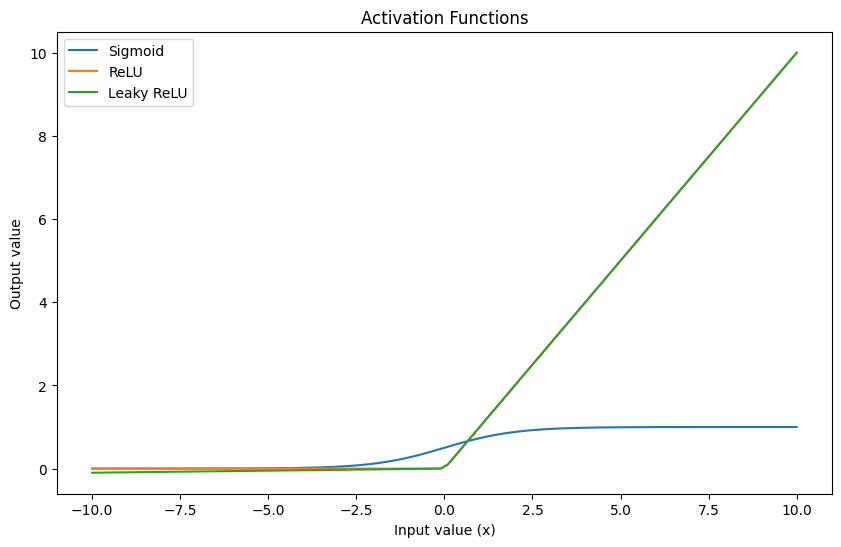

In [5]:
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

# Plotting
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.title('Activation Functions')
plt.xlabel('Input value (x)')
plt.ylabel('Output value')
plt.legend()
plt.show()


## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [6]:
def forward_propagation(X):
    # Hidden layer
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)  # Using ReLU for hidden layer

    # Output layer
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)  # Using sigmoid for output layer (for binary classification)

    return A2  # This is the output of the network

# Example usage
X_sample = np.random.randn(1, input_size)  # Simulated input
output = forward_propagation(X_sample)
print("Network output:", output)


Network output: [[0.50739601 0.50798231 0.48972231 0.49129594 0.49495508 0.49962382
  0.50282301 0.51010474 0.49425857 0.49985837]]


## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [7]:
def compute_loss_with_regularization(A2, Y, parameters, lambda_reg):
    m = Y.shape[0]  # number of examples
    W1, W2 = parameters['W1'], parameters['W2']
    
    # Cross-entropy part
    cross_entropy_loss = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    
    # L2 Regularization part
    l2_loss = (lambda_reg / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    loss = cross_entropy_loss + l2_loss
    return loss



## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [1]:
def backward_propagation(X, Y, W1, b1, W2, b2, lambd):
    m = X.shape[1]
    
    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    
    # Loss derivatives (MSE + L2 Regularization)
    dZ2 = Z2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T) + (lambd / m) * W2
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU
    dW1 = (1 / m) * np.dot(dZ1, X.T) + (lambd / m) * W1
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # Return gradients
    return dW1, db1, dW2, db2

def gradient_descent(X, Y, W1, b1, W2, b2, learning_rate=0.01, epochs=1000, lambd=0.1):
    # List to store loss values for plotting
    loss_history = []
    
    # Gradient Descent Loop
    for epoch in range(epochs):
        # Forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1) + b2
        
        # Compute loss with L2 regularization
        loss = compute_loss_with_L2(Y, Z2, W1, W2, lambd)
        loss_history.append(loss)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, W1, b1, W2, b2, lambd)
        
        # Update parameters (weights and biases)
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss}")
    
    # Return final weights, biases, and loss history
    return W1, b1, W2, b2, loss_history

## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [14]:
def initialize_adam(parameters):
    v = {}
    s = {}
    for key, value in parameters.items():
        v["d" + key] = np.zeros_like(value)
        s["d" + key] = np.zeros_like(value)
    return v, s

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    v_corrected = {}
    s_corrected = {}

    for key in parameters.keys():
        v["d" + key] = beta1 * v["d" + key] + (1 - beta1) * grads['d' + key]
        v_corrected["d" + key] = v["d" + key] / (1 - beta1 ** t)

        s["d" + key] = beta2 * s["d" + key] + (1 - beta2) * (grads['d' + key] ** 2)
        s_corrected["d" + key] = s["d" + key] / (1 - beta2 ** t)

        parameters[key] -= learning_rate * v_corrected["d" + key] / (np.sqrt(s_corrected["d" + key]) + epsilon)
    return parameters, v, s
